# [Entregável 1](https://docs.google.com/document/d/1SbG_ik_haXcKwjXVuvHvPhej0aHDRE8dY3296Cf7VQU/edit)

## Setup

In [ ]:
import os

# Instala pt_BR para as datas
!/usr/share/locales/install-language-pack pt_BR
!dpkg-reconfigure locales

# Reinicia os processos do Python para atualizar os locales
os.kill(os.getpid(), 9)

# Precisa rodar isso uma vez só, se der um erro pode continuar rodando daqui pra baixo

Generating locales (this might take a while)...
Generation complete.
dpkg-trigger: error: must be called from a maintainer script (or with a --by-package option)

Type dpkg-trigger --help for help about this utility.
Generating locales (this might take a while)...
  en_US.UTF-8... done
  pt_BR.ISO-8859-1... done
Generation complete.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import datetime as dt
# Deve printar pt_BR em alguma linha se instalou corretamente
!locale -a

C
C.utf8
en_US.utf8
POSIX
pt_BR
pt_BR.iso88591


In [4]:
# Printa o locale antes de alterar
print("Antes:", locale.getlocale())
locale.setlocale(locale.LC_ALL, "pt_BR")
# Printa o local depois de alterar para pt_BR
print("Depois:", locale.getlocale())

Antes: ('pt_BR', 'ISO8859-1')
Depois: ('pt_BR', 'ISO8859-1')


In [5]:
df = pd.read_csv('dataset1.csv')

## a) Podemos notar que a coluna de data está formatada incorretamente. Utilize funções do pandas para convertê-la para o formato datetime.

In [6]:
print("Antes")
df.head(3)

Antes


,data,responsável,temperatura
0,sábado - 01/04/2023 00:00,Fábio,19.59
1,sábado - 01/04/2023 00:15,Fábio,19.10
2,sábado - 01/04/2023 00:30,Fábio,19.14


In [7]:
df['data'] = pd.to_datetime(df['data'], format='%A - %d/%m/%Y %H:%M')
print("Depois")
df.head(3)

Depois


,data,responsável,temperatura
0,2023-04-01 00:00:00,Fábio,19.59
1,2023-04-01 00:15:00,Fábio,19.10
2,2023-04-01 00:30:00,Fábio,19.14


## b) Esboce um gráfico da temperatura em função do tempo. O que você percebe analisando esse gráfico?

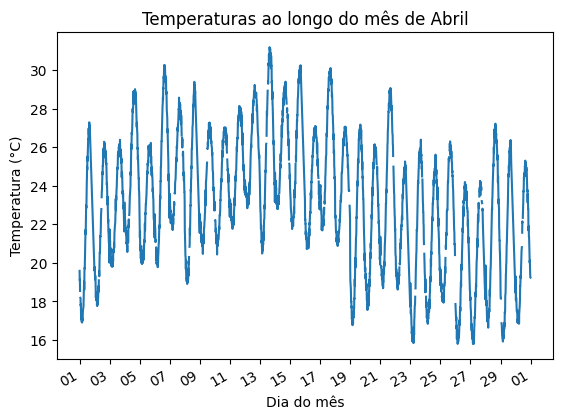

In [8]:
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
ax.plot(df['data'], df['temperatura'])
myFmt = DateFormatter("%d")
ax.xaxis.set_major_formatter(myFmt)
plt.title("Temperaturas ao longo do mês de Abril")
plt.ylabel('Temperatura (°C)')
plt.xlabel('Dia do mês')
fig.autofmt_xdate()
tick_spacing = 2
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()

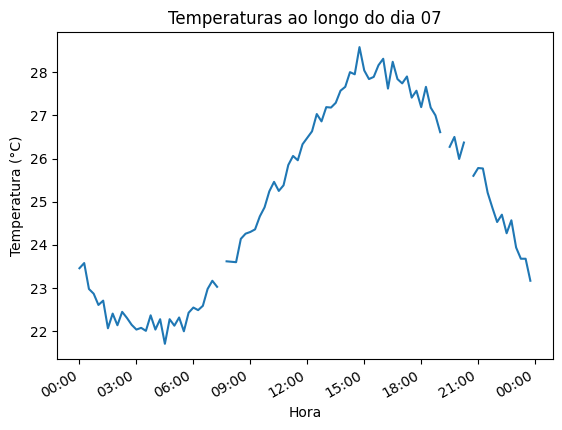

In [9]:
data = df.loc[df['data'].dt.normalize() == '2023-04-07']
fig, ax = plt.subplots()
ax.plot(data['data'], data['temperatura'])
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)
plt.title("Temperaturas ao longo do dia 07")
plt.ylabel('Temperatura (°C)')
plt.xlabel('Hora')
plt.ylabel('Temperatura (°C)')
fig.autofmt_xdate()
plt.show()

A temperatura oscila com certa periodicidade ao longo dos dias, atingindo padrões diários semelhantes a esse do dia 7.

## c) John identificou que os dados enviados por um dos estudantes apresentou um comportamento suspeito. Você consegue identificá-lo?

Para investigar, vamos analisar as medições de cada pessoa.

In [10]:
print("Lista de todas as pessoas:", df['responsável'].unique())

Lista de todas as pessoas: ['Fábio' 'Fernando' 'Júlia' 'Letícia' 'Marcela' 'Rafael']


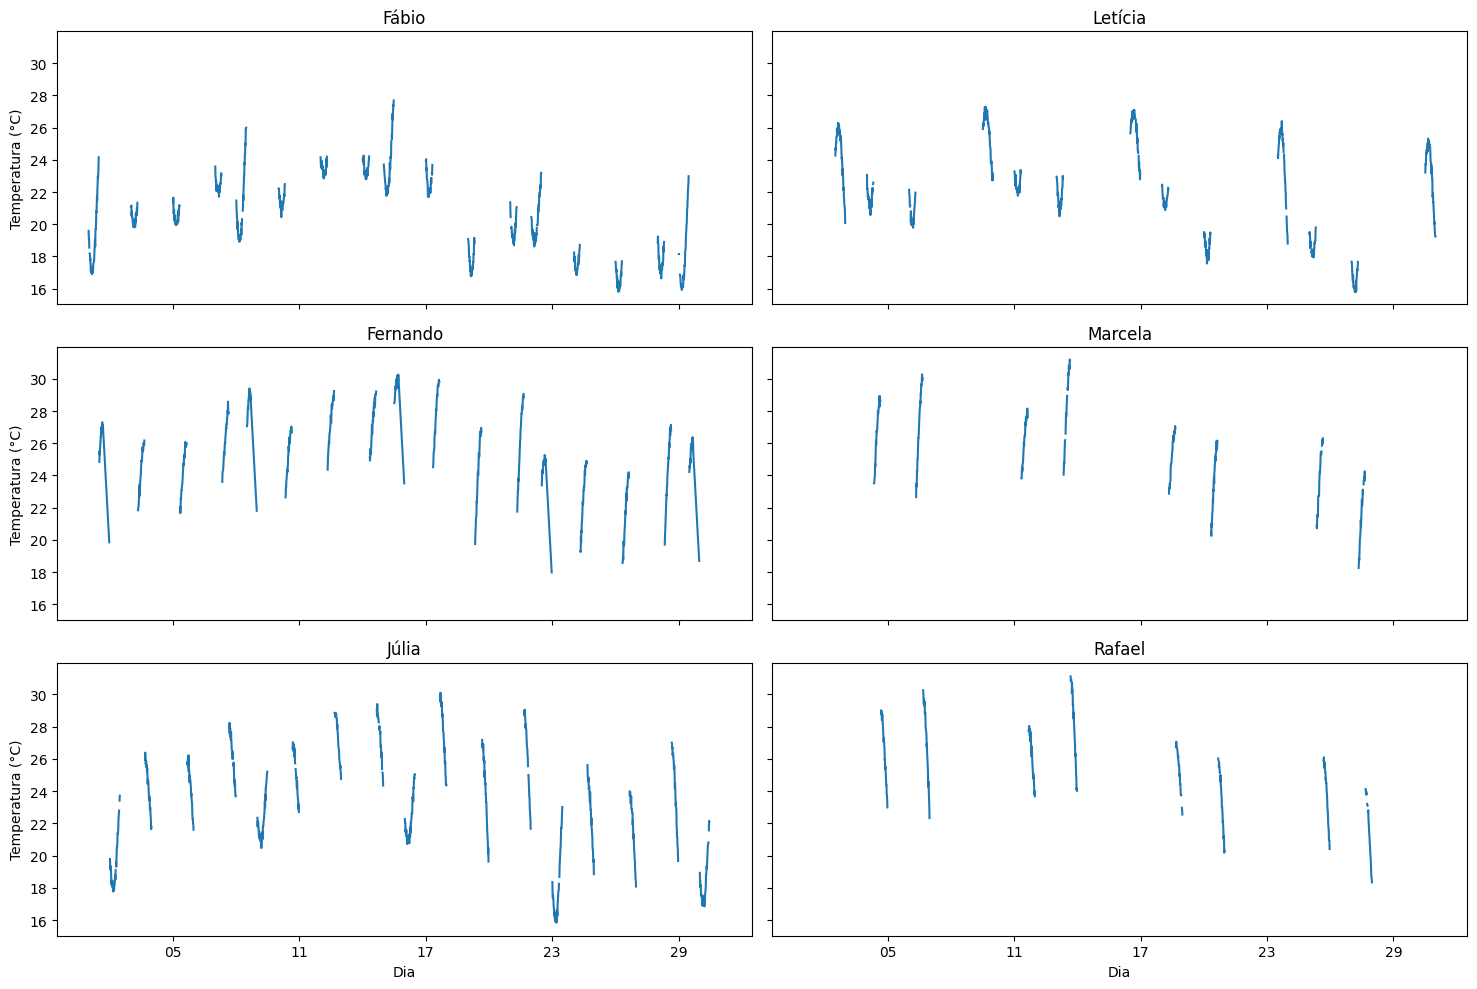

In [11]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(15, 10))

# Colocando NaN em todas as primeiras e últimas medições da pessoa no dia para que não apareçam nos gráficos
data = df
date = data['data'][0]
name = data['responsável'][0]
for i in data['data']:
    if data.loc[data['data'] == i, 'responsável'].values[0] != name:
        data.loc[data['data'] == pd.to_datetime(date, format='%Y/%m/%d %H:%M:%S'), ['temperatura']] = np.nan
        data.loc[data['data'] == pd.to_datetime(i, format='%Y/%m/%d %H:%M'), ['temperatura']] = np.nan
    date = i
    name = data.loc[data['data'] == i, 'responsável'].values[0]

# Plotando os 6 gráficos isolados de cada pessoa
fabio = data.query("responsável == 'Fábio'")
fernando = data.query("responsável == 'Fernando'")
julia = data.query("responsável == 'Júlia'")
leticia = data.query("responsável == 'Letícia'")
marcela = data.query("responsável == 'Marcela'")
rafael = data.query("responsável == 'Rafael'")

axs[0, 0].plot(fabio['data'], fabio['temperatura'])
myFmt = DateFormatter("%d")
ax.xaxis.set_major_formatter(myFmt)
axs[0, 0].set_title("Fábio")

axs[1, 0].plot(fernando['data'], fernando['temperatura'])
myFmt = DateFormatter("%d")
ax.xaxis.set_major_formatter(myFmt)
axs[1, 0].set_title("Fernando")

axs[2, 0].plot(julia['data'], julia['temperatura'])
myFmt = DateFormatter("%d")
ax.xaxis.set_major_formatter(myFmt)
axs[2,0].set_title("Júlia")

axs[0, 1].plot(leticia['data'], leticia['temperatura'])
myFmt = DateFormatter("%d")
ax.xaxis.set_major_formatter(myFmt)
axs[0, 1].set_title("Letícia")

axs[1, 1].plot(marcela['data'], marcela['temperatura'])
myFmt = DateFormatter("%d")
ax.xaxis.set_major_formatter(myFmt)
axs[1, 1].set_title("Marcela")

axs[2, 1].plot(rafael['data'], rafael['temperatura'])
myFmt = DateFormatter("%d")
ax.xaxis.set_major_formatter(myFmt)
axs[2, 1].set_title("Rafael")

# Ajustando labels
for ax in axs.flat:
    ax.set(xlabel='Dia', ylabel='Temperatura (°C)')

for ax in axs.flat:
    ax.label_outer()

myFmt = DateFormatter("%d")
for ax in axs.flat:
    ax.xaxis.set_major_formatter(myFmt)

tick_spacing = 6
for ax in axs.flat:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

fig.tight_layout()

A partir daí, é possível perceber que as medições de Fernando em certos dias formam praticamente retas perfeitas, vale a pena investigar esses dias para confirmar essa hipótese. Por algum motivo, esses dias foram todos em sábados, então será feita uma análise mais profunda dos sábados de Fernando.

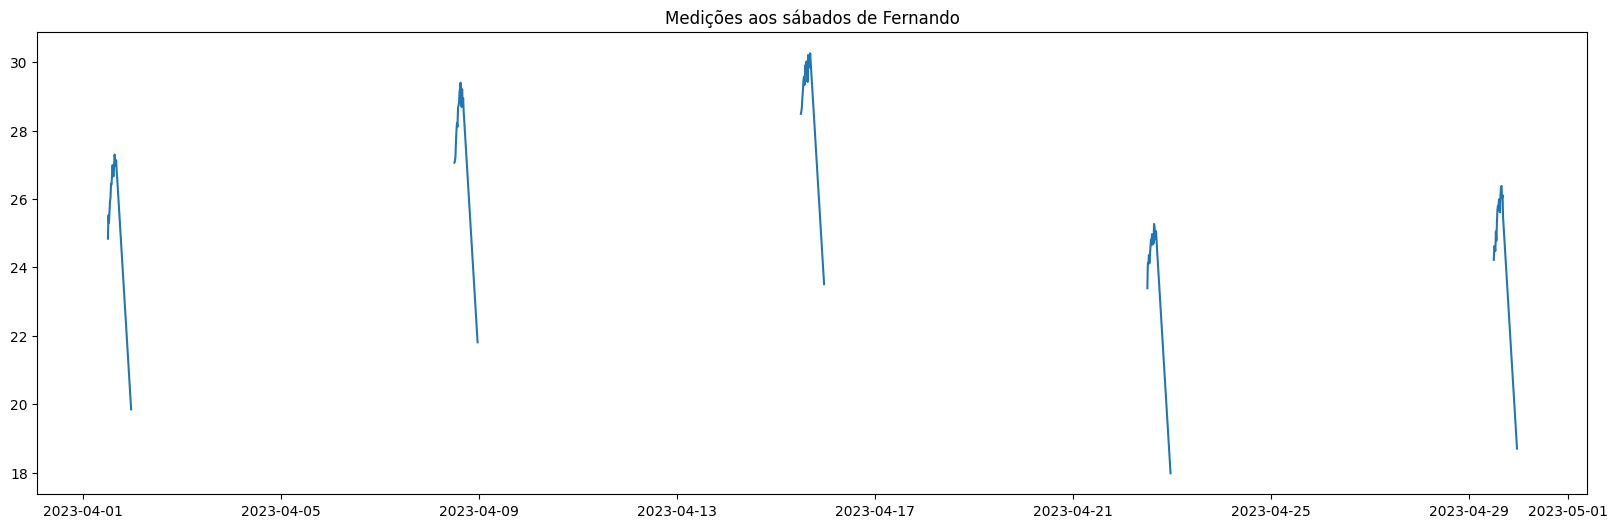

In [12]:
data = fernando[fernando['data'].dt.dayofweek == 5]
fig, ax = plt.subplots(figsize=(20,6))
plt.title("Medições aos sábados de Fernando")
ax.plot(data['data'], data['temperatura'])

Analisando um desses sábados

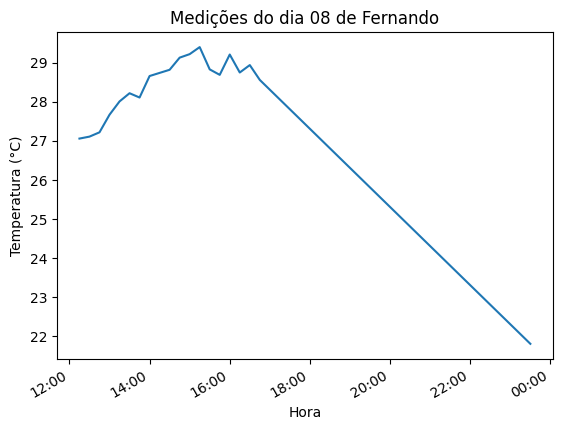

In [13]:
data = fernando.loc[fernando['data'].dt.normalize() == '2023-04-08']
fig, ax = plt.subplots()
ax.plot(data['data'], data['temperatura'])
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)
plt.title("Medições do dia 08 de Fernando")
plt.ylabel('Temperatura (°C)')
plt.xlabel('Hora')
fig.autofmt_xdate()
plt.show()

A partir dos valores do gráfico, provamos que em todos os sábados de Fernando, de 16:45 até 23:45, as medições dele formam uma reta perfeita, o que é um tanto quanto improvável. Ou seja, Fernando é um cara muito sortudo.

## d) O dataset apresenta diversos valores ausentes de temperatura. Determine um método adequado para lidar com esses dados. (Dica: considere implementar uma solução de imputação com base em séries temporais.)

In [14]:
print("Antes:")
df['temperatura'].isna().sum()

Antes:


232

In [15]:
df['temperatura'].fillna(method = 'bfill', inplace = True)

In [16]:
print("Depois:")
df['temperatura'].isna().sum()

Depois:


0

## e) Qual foi a quarta-feira mais fria do mês? Isto é, com a menor temperatura mínima? Qual foi essa temperatura?

In [17]:
data = df[df['data'].dt.dayofweek == 2]
print("Temperatura mínima numa quarta:", min(data['temperatura']))
print("Temperatura máxima numa quarta:", max(data['temperatura']))

Temperatura mínima numa quarta: 15.8
Temperatura máxima numa quarta: 29.24


## f) Construa um gráfico para as temperaturas máximas e mínimas ao longo do mês.

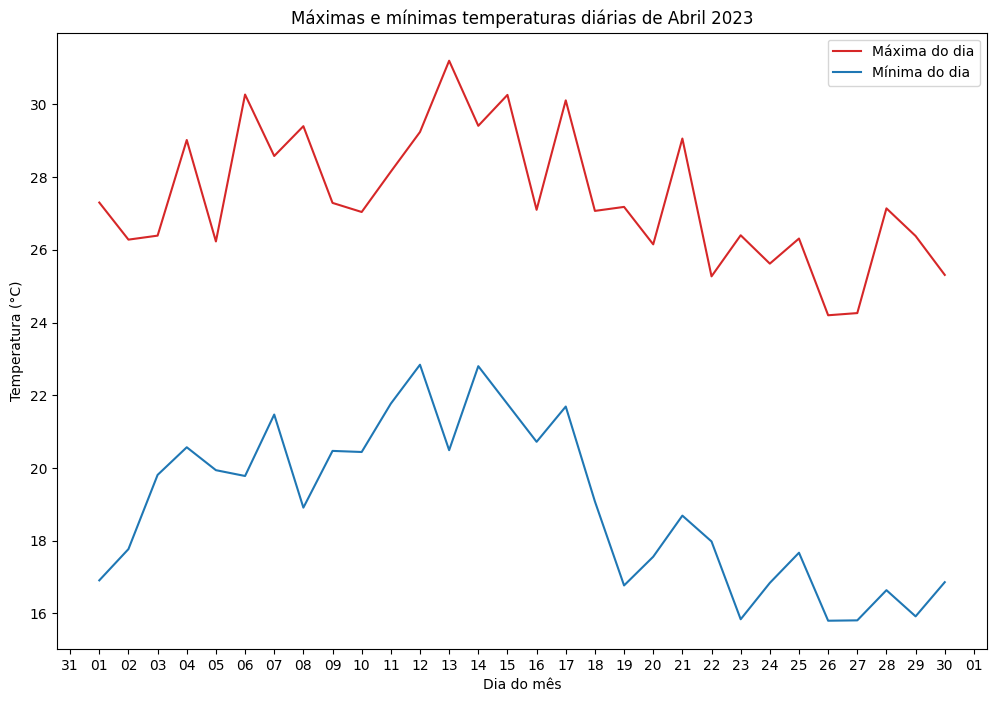

In [18]:
max = df.groupby([df['data'].dt.date])['temperatura'].max()
min = df.groupby([df['data'].dt.date])['temperatura'].min()
ax = max.plot(label='Máxima do dia', color='tab:red', figsize=(12, 8))
min.plot(ax=ax, label='Mínima do dia', color='tab:blue')
plt.legend()
myFmt = DateFormatter("%d")
ax.xaxis.set_major_formatter(myFmt)
plt.title("Máximas e mínimas temperaturas diárias de Abril 2023")
plt.ylabel('Temperatura (°C)')
plt.xlabel('Dia do mês')
fig.autofmt_xdate()
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))